---

# 🏆 **SFPPy Example: Mass Transfer from Monolayer Materials**  
> SFPPy: a Python Framework for Food Contact Compliance and Risk Assessment 🍏⏩🍎
---

## 🥪🥖 Example 1: Migration of Additives from **LDPE Film** into a Fatty Sandwich  
------------------------------------------------------------------------  

### 🔍 **Overview**  
This script simulates **1D mass transfer** of **🧪 Irganox 1076** and **🧪 Irgafos 168**  
from a **📏 100 µm LDPE film** into a **🥪 fatty sandwich**.  
The simulation covers **📆 10 days at 🌡️ 7°C**.

### 🛠 **Simulation Steps:**  
1️⃣ **Define the sandwich geometry** (🥖 cylindrical shape).  
2️⃣ **Set up the polymer layer** (🛡️ LDPE with additives).  
3️⃣ **Define the food properties** (🥑 real, 🧈 semisolid, 🍔 fatty).  
4️⃣ **Simulate mass transfer** for:  
   - **🔬 Irganox 1076 in LDPE**.  
   - **🔬 Irgafos 168 in LDPE**.  
5️⃣ **Compare migration kinetics** between both cases.  
6️⃣ **📊 Save and print all simulation results**.  

### 🎯 **Expected Outcomes:**  
✅ **Clear comparison of migration kinetics** for both additives.  
✅ **Better understanding of **additive behavior in food packaging**.  
✅ **📈 Ready-to-use figures & 📑 reports for food safety analysis**.  

### 🔄 **Updates**  
🆕 ✅ **Substances are now populated in the "foodlayer"** to improve estimates of **partition coefficients**.

---

📌 **Project:** SFPPy - 🛡️ SafeFoodPackaging Portal in Python Initiative  
👨‍💻 **Author:** INRAE\\olivier.vitrac@agroparistech.fr  
📜 **License:** MIT  

***

## 👇 | Minimal Configurator of 🌐**SFPPyLite** ⏳
⏱️ *First execution may take 5–20 seconds*<br>
> After this step, **no internet connection is needed**.


In [1]:
# 📝 Notebook configuration
nbCONF = {"📌": "🌐SFPPyLite 📑 |&nbsp; <strong>Example ❶</strong> &nbsp; | 🍽️ &nbsp;<i>monolayer materials</i>&nbsp;🧫", "🎨": "svg", "⚠️": False, "🚨": False} # | 📌:title |🎨:renderer=svg/png/retina |⚠️: disclaimer=True/False | 🚨: alert=True/False
# ⛔ SFPPyLite configurator (the =3= lines with nbCong definition above should be included at the beginning of any SFPPyLite Notebook ‼️)
print("🚀 SFPPyLite🌐 initializing in your browser...","📦 Installing required packages (may take up to ⏳10 seconds)...",sep="\n"); import micropip, sys, os, time, builtins; start = time.time(); "/drive" in sys.path or sys.path.append("/drive"); await micropip.install(["numpy", "scipy", "matplotlib", "pandas", "ipywidgets", "nbformat", "openpyxl"])
print("🧱 Assembling notebook elements..."); from IPython.display import display, HTML; from utils.nbutils import set_figure_format, create_header_footer, create_logo, create_subtitle, create_synopsis, create_disclaimer, create_alert, separator2, bigseparator; set_figure_format(nbCONF.get("🎨")); logo, subtitle, synopsis, disclaimer, alert, = create_logo(), create_subtitle(), create_synopsis(), create_disclaimer(), create_alert(fontsize=14)
(header,footer,separator) = create_header_footer(title=nbCONF.get("📌"),what="all"); print(f"✅ SFPPyLite🌐 initialized in {time.time()-start:.2f} seconds."); what = [header] + ([subtitle, separator, disclaimer] if nbCONF.get("⚠️") else []) + ([separator,alert] if nbCONF.get("🚨") else []); display(*what)

🚀 SFPPyLite🌐 initializing in your browser...
📦 Installing required packages (may take up to ⏳10 seconds)...
🧱 Assembling notebook elements...


Matplotlib is building the font cache; this may take a moment.


📊 Matplotlib inline figure format set to: svg
✅ SFPPyLite🌐 initialized in 5.66 seconds.


### Dependencies ⏳

⏱️ *Initial compilation may take up to 10–15 s*<br>
> If you encounter any issues, go to the MENU ☰ and select **Kernel → Restart Kernel**.


In [2]:
start = time.time(); print("⏳ Compile SFPPy🍏⏩🍎 libraries and load chemical databases ⌬...")
from patankar.loadpubchem import migrant    # Migrant online database
from patankar.geometry import Packaging3D   # 3D geometry module
import patankar.food as food                # Food contact classes
import patankar.layer as polymer            # Polymer database
from patankar.migration import senspatankar as solver # Mass transfer solver
from patankar.migration import CFSimulationContainer as store # Store results
from patankar.migration import print_figure # Printing functions
from patankar.layer import _toSI            # Convert units to SI
print(f"✅ Import/compilation completed in {time.time() - start:.2f} seconds."); bigseparator("1 | Reference")

⏳ Compile SFPPy🍏⏩🍎 libraries and load chemical databases ⌬...
✅ Import/compilation completed in 12.21 seconds.


## 1 | **Reference migration case with Irganox 1076** `m1`

### 1.1 | **Define the output directory to store results**

In [9]:
outputfolder = os.path.join(os.getcwd(), "tmp")
os.makedirs(outputfolder, exist_ok=True)  # Create folder if missing
print("output folder:",outputfolder);

output folder: /drive/notebooks/tmp


***
### 1.2 | **Store numbers with their units in tuples** `()`

In [10]:
contactTemperature = (7, "degC")
contactTime = (10, "days")  # Contact duration

***

### 1.3 | **Concentrations are in arbitrary units** (e.g., mg/kg)

In [11]:
maxConcentration = 5000  # Maximum initial concentration in the polymer

***

### 1.4 | **Create a **cylindrical sandwich** modeled using** `Packaging3D`.

In [12]:
sandwich_geom = Packaging3D(
    'Cylinder',
    height=(19, "cm"),  # Cylinder height (19 cm)
    radius=(6, "mm")    # Cylinder radius (6 mm)
)
# Display packaging geometry details
repr(sandwich_geom)

# Compute internal volume (m³) and contact surface area (m²)
internalvolume, contactsurface = sandwich_geom.get_volume_and_area()

Connector(name='cylinder_top', area=0.0001131 m², axis=(0.00, 0.00, 1.00))
Connector(name='cylinder_bottom', area=0.0001131 m², axis=(0.00, 0.00, -1.00))
Cylinder(
  Dimensions: radius=0.006 m, height=0.19 m
  Volume: 2.149e-05 m³
  Surface Area: 0.007389 m²
  Connectors:
  - <Connector: cylinder_top>
  - <Connector: cylinder_bottom>
)
Packaging3D(geometry_name='Cylinder', shape=
<Cylinder with 2 connectors>)


***

### 1.5 | **Retrieve chemical properties of the migrant (Irganox 1076)**

In [13]:
m1 = migrant("irganox 1076")
# Display migrant m1 details
repr(m1)

<migrantToxtree object>
               Compound: 3-(3,5-ditert-butyl- [...] c acid stearyl ester
                   Name: octadecyl 3-(3,5-dit [...] oxyphenyl)propanoate
                    cid: 16386
                    CAS: 2082-79-3
                M (min): 530.9
                M_array: [530.9]
                formula: C35H62O3
                 smiles: CCCCCCCCCCCCCCCCCCOC [...] )C(C)(C)C)O)C(C)(C)C
               InChiKey: SSDSCDGVMJFTEQ-UHFFFAOYSA-N
                   logP: [13.8]
              P' (calc): [0.]
       ---🇪🇺 EC 10/2011: ---------------
                    SML: 6 [mg/kg]
             EC|FCM|REF: 218-216-0|433|68320
      ---🇺🇸 US FCN list: ---------------
                 FCM No: [124, 181, 386, 768, [...] 5, 2035, 2340, 2387]
               Notifier: ['ATOFINA Petrochemi [...] nal-Americas, Inc.']
           Manufacturer: ['Arkema Inc.', 'BAS [...] nal-Americas, Inc.']
                N. Date: ['07/04/2001', '01/1 [...] 2024', '10/22/2024']
                Mixture:

'<migrantToxtree: OCTADECY [...] OPIONATE - M=530.9 g/mol>'

***

### 1.6 | Create a **100 µm thick LDPE layer** containing **Irganox 1076**

In [14]:
LDPElayer_with_m1 = polymer.LDPE(
    l=(100, "um"),    # Thickness: 100 µm
    substance=m1,
    C0=maxConcentration,  # Initial concentration in LDPE
    T=contactTemperature  # Contact temperature
)
# Display Packaging layer details
repr(LDPElayer_with_m1)


[LAYER object version=1, contact=olivier.vitrac@agroparistech.fr]
monolayer of LAYER object:
-- [ layer 1 of 1 ] ---------- barrier rank=1 --------------
      name: "layer in LDPE"
      type: "polymer"
  material: "low-density polyethylene"
      code: "LDPE"
   crystal: 0.4
        Tg: -130 [degC]
         l: 0.0001 [meter]
         D: 4.325e-15 [m**2/s]
          = Dpiringer(LDPE,<migrant: OCTADECY [...] OPIONATE - M=530.9 g/mol>,T=7.0 degC)
         k: 26.19 [a.u.]
          = kFHP(<ethylene>,<migrant: OCTADECY [...] OPIONATE - M=530.9 g/mol>)
        C0: 5000 [a.u.]
         T: 7 [degC]


"<LDPE with 1 layer: ['layer in LDPE']>"

***

### 1.7 | Define a **fatty sandwich** using multiple inheritance from
- `food.realfood`,
- `food.semisolid`,
- and `food.fat`.

In [15]:
class sandwich(food.realfood, food.semisolid, food.fat):
    name = "sandwich"

***

### 1.8 | **Instantiate the food layer**

In [17]:
FOODlayer = sandwich(
    volume=internalvolume,
    surfacearea=contactsurface,
    contacttime=contactTime,
    contacttemperature=contactTemperature,
    # omit these two lines if you want to test with default values
    substance=m1,        # required to predict partition coefficients
    simulant="ethanol"   # required to predict partition coefficients
)
# Display FOODlayer details
print(repr(FOODlayer))
bigseparator("2 | Reference Simulation")

Food object "sandwich" (real food class) with properties:
               CF0: 0 [a.u.]
contacttemperature: 7 [degC]
       contacttime: 864000 [s]
           density: 1000 [kilogram / meter ** 3]
                 h: 1e-07 [meter / second]
                k0: 0.63893733 [a.u.]
                  = kFHP(<ethanol>,<migrant: OCTADECY [...] OPIONATE - M=530.9 g/mol>)
       surfacearea: 0.0073890259 [meter ** 2]
            volume: 2.1488494e-05 [meter ** 3]
<sandwich: sandwich>


## 2 | **Reference simulation**

### 2.1 | Simulate migration for **Irganox 1076** in LDPE

In [18]:
simulation = solver(
    LDPElayer_with_m1,  # LDPE containing Irganox 1076
    FOODlayer,          # Fatty sandwich
    name="I1076-LDPE-sandwich"
)

# Display simulation details
repr(simulation)
# print(simulation)

# Retrieve concentration at target time in SI units
print("CF at time t=", simulation.ttarget, "[s] = ", simulation.CFtarget, "[a.u.]")

SensPatankarResult: I1076-LDPE-sandwich
	 <no description>
	 - with 1000 time steps
 	 - with 1800 spatial points
	 - Time range: [0.00e+00, 1.73e+06] s
	 - Position range: [0.00e+00, 1.00e-04] m
CF at time t= [864000] [s] =  [116.44534524] [a.u.]


***

### 2.2 | Interpolates concentration values at **specific contact times** between 0 and **2 × ttarget**.
> Beyond `2 × ttarget`, extrapolation is required.

In [19]:
tnew = _toSI(([3, 8, 9, 10, 12, 14, 18], "days")).flatten()
CF = simulation.interpolate_CF(tnew).flatten()

***

### 2.3 | **Concentration profiles at `ttarget`**

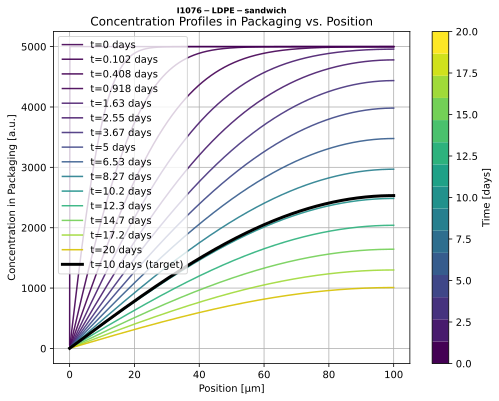

In [20]:
simulation.plotCx(); # add ; to prevent a second copy of the figure

***
### 2.4 | **Migration kinetics (CF vs time)**

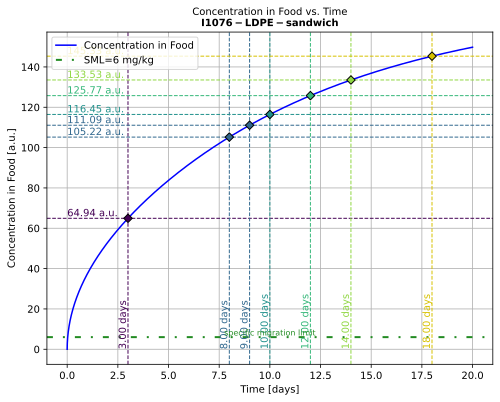

In [21]:
hfig1 = simulation.plotCF(t=tnew)

***

## 2.5 | Store the simulation results for **Irganox 1076**

In [24]:
allCF = store(name="sandwich")
allCF.add(simulation, "Irganox 1076", "r")  # Assign red color "r"
bigseparator("3 | Repetition with Irgafos 168")

## 3 | **Repeat all operations for Irgafos 168** : substance denoted `m2`

<migrantToxtree object>
               Compound: phosphorous acid tri [...] t-butylphenyl) ester
                   Name: tris(2,4-ditert-butylphenyl) phosphite
                    cid: 91601
                    CAS: 31570-04-4
                M (min): 646.9
                M_array: [646.9]
                formula: C42H63O3P
                 smiles: CC(C)(C)C1=CC(=C(C=C [...] )C)C(C)(C)C)C(C)(C)C
               InChiKey: JKIJEFPNVSHHEI-UHFFFAOYSA-N
                   logP: [15.5]
              P' (calc): [0.]
       ---🇪🇺 EC 10/2011: ---------------
                    SML: 60 [mg/kg]
             EC|FCM|REF: 250-709-6|671|74240
      ---🇺🇸 US FCN list: ---------------
                 FCM No: [112, 268, 385, 814, [...] 7, 1463, 2076, 2349]
               Notifier: ['Ciba Specialty Che [...] ianlon Corporation']
           Manufacturer: ['BASF Corporation', [...] ianlon Corporation']
                N. Date: ['02/20/2001', '10/1 [...] 2020', '06/05/2024']
   ---🇨🇳 CN GB9685-2016: -----

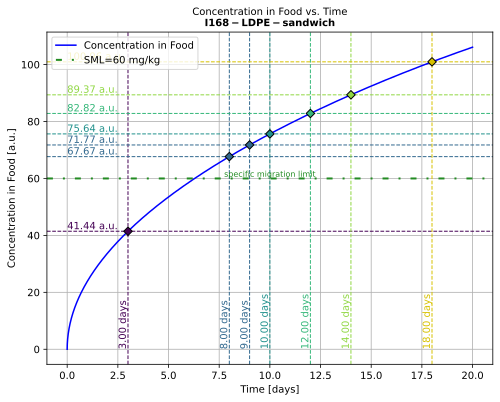

In [26]:
# Retrieve chemical properties of the second migrant (Irgafos 168)
m2 = migrant("irgafos 168")
repr(m2)

# Define the same LDPE film but containing Irgafos 168 instead
LDPElayer_with_m2 = polymer.LDPE(
    l=(100, "um"),
    substance=m2,  # <-- Updated substance
    C0=maxConcentration,
    T=contactTemperature
)
repr(LDPElayer_with_m2)

# Run migration simulation for **Irgafos 168**
simulation2 = solver(
    LDPElayer_with_m2,  # LDPE containing Irgafos 168
    FOODlayer.update(substance=m2),      # Same sandwich with updated substance
    name="I168-LDPE-sandwich"
)
repr(simulation2)

# Add the new simulation (Irgafos 168) to the results store
allCF.add(simulation2, "Irgafos 168", "b")  # Assign blue color "b"

# Generate the corresponding plot
hfig2 = simulation2.plotCF(t=tnew)

# add a separator
bigseparator("4 | Partition Coefficients: KF/P")

## 4 | **Food-to-polymer partition coefficients** ($K_{F/P}$)
> In this case, the partition coefficients are identical

In [28]:
KFP_m1 = LDPElayer_with_m1.k/FOODlayer.update(substance=m1).k0
KFP_m2 = LDPElayer_with_m2.k/FOODlayer.update(substance=m2).k0
print(f"m1:I1076 KF/P = {KFP_m1}","\n",f"m2:I168 KF/P = {KFP_m2}")
bigseparator("5 | Comparison I1076 vs I168")

⚠️ Warning: No 🇺🇸 US FDA FCS record found for PubChem cid 702.
m1:I1076 KF/P = [40.98282234] 
 m2:I168 KF/P = [40.98282234]


## 5 | Compare CF vs time for **Irganox 1076** and **Irgafos 168**

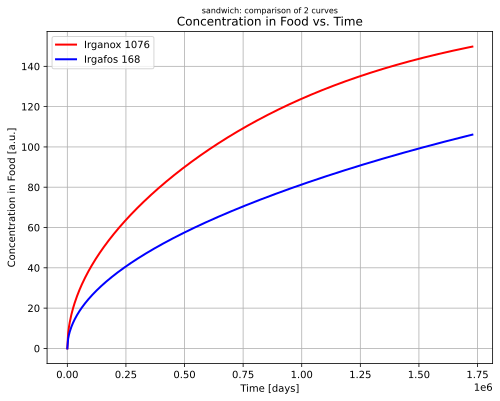

In [29]:
hfig12 = allCF.plotCF(plotSML=False)
bigseparator("6 | Printing")

## 6 | **Print Figures in PDF and PNG**

> Printing is offered for valid figure handles, use QT

In [30]:
printconfig = {"destinationfolder": outputfolder, "overwrite": True}
print_figure(hfig1, **printconfig)
print_figure(hfig2, **printconfig)
print_figure(hfig12, **printconfig)
display(separator, footer)

Saved PDF: /drive/notebooks/tmp/pltCF_I1076-LDPE-sandwich.pdf
Saved PNG: /drive/notebooks/tmp/pltCF_I1076-LDPE-sandwich.png
Saved PDF: /drive/notebooks/tmp/pltCF_I168-LDPE-sandwich.pdf
Saved PNG: /drive/notebooks/tmp/pltCF_I168-LDPE-sandwich.png
Saved PDF: /drive/notebooks/tmp/cmp_pltCF_sandwich.pdf
Saved PNG: /drive/notebooks/tmp/cmp_pltCF_sandwich.png
